
<h1>Задание 1</h1>

У вас есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Задание 1.1</h2>

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их. 

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

In [2]:
df = pd.read_csv('shopping_trends.csv')

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [5]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [6]:
df.describe(include=['object'])[['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']]

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


Гипотезы:
- мужчины чаще применяют промокоды
- женщины в среднем ставят более высокие оценки
- женщины больше тратят в среднем на одного человека
- клиенты с подпиской покупают больше товаров на одного человека и тратят денег больше на одного человека
- в крупных штатах чаще покупают дорогие товары

In [7]:
df.groupby(by=['Gender', 'Promo Code Used'])['Customer ID'].count()

Gender  Promo Code Used
Female  No                 1248
Male    No                  975
        Yes                1677
Name: Customer ID, dtype: int64

Гипотеза 1 подтвердилась - мужчины чаще применяют промокоды, женщины их вообще не применяют

In [8]:
df.groupby(by=['Gender'])['Review Rating'].mean()

Gender
Female    3.741426
Male      3.753959
Name: Review Rating, dtype: float64

Гипотеза 2 не подтвердилась, женщины ставят в среднем более низкие оценки

In [9]:
df.groupby(by=['Gender'])['Purchase Amount (USD)'].mean()

Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64

In [10]:
df_grouped_amount = df.groupby(by=['Gender']).agg({'Purchase Amount (USD)': 'sum', 'Customer ID': 'nunique'}).reset_index()
df_grouped_amount['amount_on_customer'] = df_grouped_amount['Purchase Amount (USD)']/df_grouped_amount['Customer ID']

In [11]:
df_grouped_amount

,Gender,Purchase Amount (USD),Customer ID,amount_on_customer
0,Female,75191,1248,60.249199
1,Male,157890,2652,59.536199


Гипотеза 3 подтвердилась - женщины в среднем на одного человека тратят больше денег

In [12]:
df_grouped_by_subscription = df.groupby(by=['Subscription Status']).agg({'Purchase Amount (USD)': 'sum', 'Customer ID': 'nunique', 'Item Purchased': 'count'}).reset_index()
df_grouped_by_subscription['amount_on_customer'] = df_grouped_by_subscription['Purchase Amount (USD)']/df_grouped_by_subscription['Customer ID']
df_grouped_by_subscription['items_on_customer'] = df_grouped_by_subscription['Item Purchased']/df_grouped_by_subscription['Customer ID']

In [13]:
df_grouped_by_subscription

,Subscription Status,Purchase Amount (USD),Customer ID,Item Purchased,amount_on_customer,items_on_customer
0,No,170436,2847,2847,59.865121,1.0
1,Yes,62645,1053,1053,59.491928,1.0


Гипотеза 4 не подтвердилась, покупатели с подпиской тратят в среднем на одного человека меньше денег, но можно сказать, что одинаково, и можно также заметить, что в нашем датасете каждый клиент купил всего один товар

Самые крупные штаты:
- Калифорния
- Нью-Йорк
- Техас
- Флорида
- Иллинойс

In [14]:
# разделим все цены на 10 ценовых категорий
df['decile'] = pd.qcut(df['Purchase Amount (USD)'], 10, labels=False)
df['decile'] = df['decile'] + 1

In [15]:
sorted(pd.qcut(df['Purchase Amount (USD)'], 10).unique())

[Interval(19.999, 27.0, closed='right'),
 Interval(27.0, 35.0, closed='right'),
 Interval(35.0, 43.0, closed='right'),
 Interval(43.0, 51.0, closed='right'),
 Interval(51.0, 60.0, closed='right'),
 Interval(60.0, 68.0, closed='right'),
 Interval(68.0, 76.0, closed='right'),
 Interval(76.0, 84.0, closed='right'),
 Interval(84.0, 93.0, closed='right'),
 Interval(93.0, 100.0, closed='right')]

In [16]:
df_grouped_by_location = df.groupby(by=['Location', 'decile']).agg({'Purchase Amount (USD)': 'count'}).reset_index()
df_grouped_by_location = df_grouped_by_location.rename(columns={'Purchase Amount (USD)': 'cnt'})

In [17]:
df_pivot = df_grouped_by_location.pivot(index='Location', columns='decile', values='cnt')

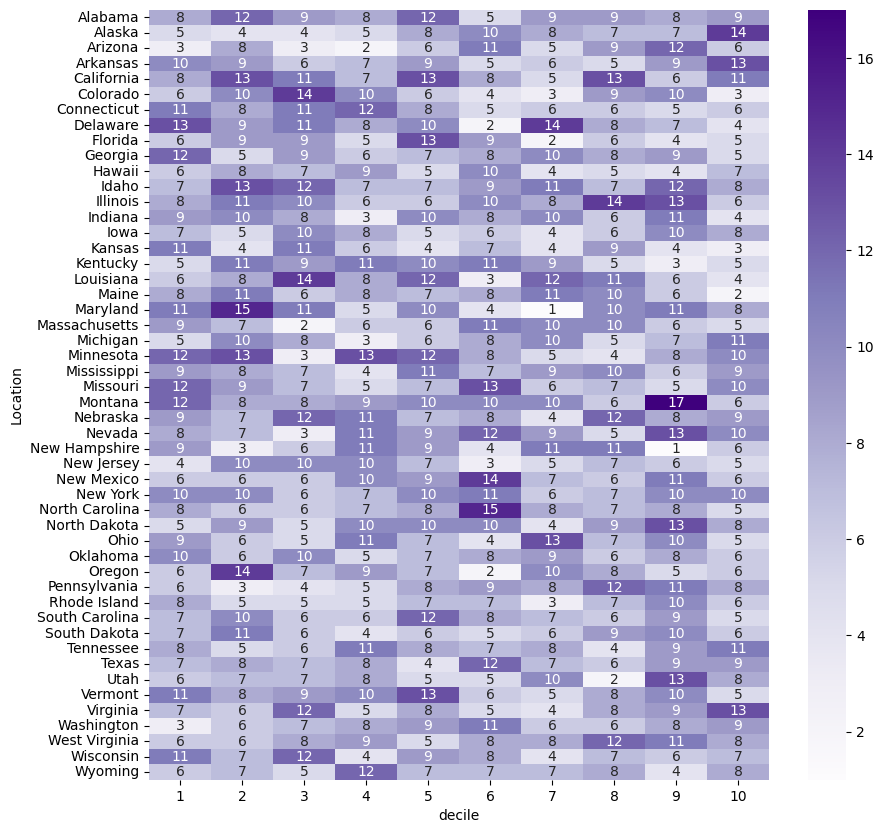

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df_pivot, annot=True, fmt="g", cmap='Purples')
plt.show()

In [19]:
df.groupby(by='Location').agg({'decile': 'mean'}).reset_index().sort_values(by='decile', ascending=[False])

,Location,decile
1,Alaska,6.388889
37,Pennsylvania,6.337838
2,Arizona,6.261538
47,West Virginia,5.950617
46,Washington,5.904110
27,Nevada,5.885057
33,North Dakota,5.843373
45,Virginia,5.818182
43,Utah,5.788732
21,Michigan,5.780822


Нельзя сказать, что в наших данных есть зависимость между тем, на сколько крупный штат, и частотой приобретения более дорогих товаров

In [20]:
# топ 10 штатов по сумме покупок
df.groupby(by=['Location']).agg({'Purchase Amount (USD)': 'sum'}).reset_index().sort_values(by='Purchase Amount (USD)', ascending=False).head(10)

,Location,Purchase Amount (USD)
25,Montana,5784
12,Illinois,5617
4,California,5605
11,Idaho,5587
27,Nevada,5514
0,Alabama,5261
31,New York,5257
33,North Dakota,5220
47,West Virginia,5174
26,Nebraska,5172


<h2>Задание 1.2</h2>

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды. 

Самый популярный товар

In [21]:
the_most_popular_item = df.groupby(by=['Item Purchased'])['Customer ID'].count().reset_index()
max_count = max(the_most_popular_item['Customer ID'])
the_most_popular_item = the_most_popular_item.rename(columns={'Customer ID': 'cnt_items'})
the_most_popular_item[the_most_popular_item['cnt_items'] == max_count]

,Item Purchased,cnt_items
2,Blouse,171
12,Jewelry,171
13,Pants,171


Распределение покупателей по полу

In [22]:
df_grouped_by_gender = df.groupby(by=['Gender'])['Customer ID'].count().reset_index()
df_grouped_by_gender = df_grouped_by_gender.rename(columns={'Customer ID': 'cnt'})

In [23]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

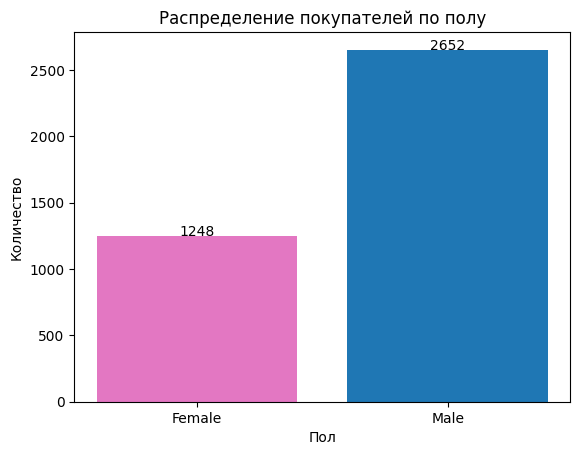

In [24]:
fig, ax = plt.subplots()
bar_colors = ['tab:pink', 'tab:blue']
ax.bar(df_grouped_by_gender['Gender'], df_grouped_by_gender['cnt'], color=bar_colors)

ax.set_ylabel('Количество')
ax.set_xlabel('Пол')
ax.set_title('Распределение покупателей по полу')
addlabels(df_grouped_by_gender['Gender'], df_grouped_by_gender['cnt'])
plt.show()

Какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары

In [25]:
df.groupby(by=['Gender']).agg({'Purchase Amount (USD)': 'sum'})

,Purchase Amount (USD)
Gender,
Female,75191
Male,157890


По сумме покупок мужчины покупают больше

In [26]:
df.groupby(by=['Gender', 'Frequency of Purchases']).agg({'Customer ID': 'count'}).reset_index()

,Gender,Frequency of Purchases,Customer ID
0,Female,Annually,185
1,Female,Bi-Weekly,188
2,Female,Every 3 Months,186
3,Female,Fortnightly,163
4,Female,Monthly,185
5,Female,Quarterly,169
6,Female,Weekly,172
7,Male,Annually,387
8,Male,Bi-Weekly,359
9,Male,Every 3 Months,398


Мужчины покупают чаще, т к их в целом больше в выборке, посмотрим на процентное соотношение

In [27]:
df_frequency_by_gender = df.groupby(by=['Gender', 'Frequency of Purchases']).agg({'Customer ID': 'count'}).reset_index()
df_frequency_by_gender = df_frequency_by_gender.merge(df_grouped_by_gender, on='Gender')
df_frequency_by_gender['Frequency_percent'] = df_frequency_by_gender['Customer ID']/df_frequency_by_gender['cnt'] * 100

In [28]:
df_frequency_by_gender

,Gender,Frequency of Purchases,Customer ID,cnt,Frequency_percent
0,Female,Annually,185,1248,14.823718
1,Female,Bi-Weekly,188,1248,15.064103
2,Female,Every 3 Months,186,1248,14.903846
3,Female,Fortnightly,163,1248,13.060897
4,Female,Monthly,185,1248,14.823718
5,Female,Quarterly,169,1248,13.541667
6,Female,Weekly,172,1248,13.782051
7,Male,Annually,387,2652,14.592760
8,Male,Bi-Weekly,359,2652,13.536953
9,Male,Every 3 Months,398,2652,15.007541


In [29]:
df_frequency_by_gender.pivot(index='Frequency of Purchases', columns='Gender')['Frequency_percent']

Gender,Female,Male
Frequency of Purchases,,
Annually,14.823718,14.592760
Bi-Weekly,15.064103,13.536953
Every 3 Months,14.903846,15.007541
Fortnightly,13.060897,14.291101
Monthly,14.823718,13.876320
Quarterly,13.541667,14.856712
Weekly,13.782051,13.838612


В процентном соотношении мужчины также покупают чаще, но не значительно

In [30]:
df_expensive = df.groupby(by=['Gender', 'Purchase Amount (USD)']).agg({'Customer ID': 'count'}).reset_index().sort_values(by=['Gender', 'Purchase Amount (USD)'], ascending=[True, False])

In [31]:
df_expensive.pivot(index='Purchase Amount (USD)', columns='Gender')['Customer ID'].reset_index().sort_values(by='Purchase Amount (USD)', ascending=False).head(10)

Gender,Purchase Amount (USD),Female,Male
80,100,11,25
79,99,21,31
78,98,18,34
77,97,17,38
76,96,18,35
75,95,16,35
74,94,16,46
73,93,13,33
72,92,12,26
71,91,20,31


Мужчины чаще покупают дорогие товары

**Посмотрим на распределение возраста наших покупателей**

In [32]:
df_grouped_by_age = df.groupby(by=['Age']).agg({'Customer ID': 'count', 'Purchase Amount (USD)': 'sum'}).reset_index()
df_grouped_by_age = df_grouped_by_age.rename(columns={'Customer ID': 'cnt', 'Purchase Amount (USD)': 'amount_sum'})

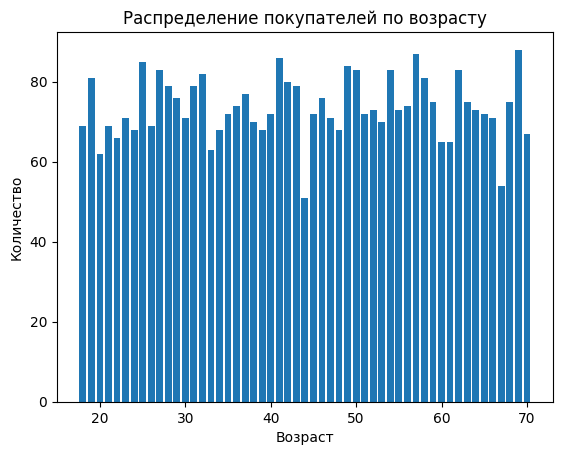

In [33]:
fig, ax = plt.subplots()
ax.bar(df_grouped_by_age['Age'], df_grouped_by_age['cnt'])

ax.set_ylabel('Количество')
ax.set_xlabel('Возраст')
ax.set_title('Распределение покупателей по возрасту')
plt.show()

In [34]:
df_grouped_by_age = df_grouped_by_age.sort_values(by='Age').reset_index(drop=True)

In [35]:
# разобьем возраст наших покупателей по когортам
df_grouped_by_age['decile'] = pd.qcut(df_grouped_by_age['Age'], 10, labels=False)
df_grouped_by_age['decile'] = df_grouped_by_age['decile'] + 1

In [36]:
age_cohorts = df_grouped_by_age.groupby('decile').agg({'Age': ['min', 'max']}).reset_index()
age_cohorts.columns = ['_'.join(col).rstrip('_') for col in age_cohorts.columns.values]
age_cohorts['age_description'] = 'от ' + age_cohorts['Age_min'].astype(str) + ' до ' + age_cohorts['Age_max'].astype(str)
df_grouped_by_age = df_grouped_by_age.merge(age_cohorts, on='decile')

In [37]:
df_grouped_by_age_cohorts = df_grouped_by_age.groupby(['age_description', 'Age_min', 'Age_max']).agg({'cnt': 'sum', 'amount_sum': 'sum'}).reset_index()

In [38]:
df_grouped_by_age_cohorts

,age_description,Age_min,Age_max,cnt,amount_sum
0,от 18 до 23,18,23,418,24967
1,от 24 до 28,24,28,384,23439
2,от 29 до 33,29,33,371,22493
3,от 34 до 38,34,38,361,21490
4,от 39 до 44,39,44,436,25732
5,от 45 до 49,45,49,371,21550
6,от 50 до 54,50,54,381,23820
7,от 55 до 59,55,59,390,22696
8,от 60 до 64,60,64,361,21400
9,от 65 до 70,65,70,427,25494


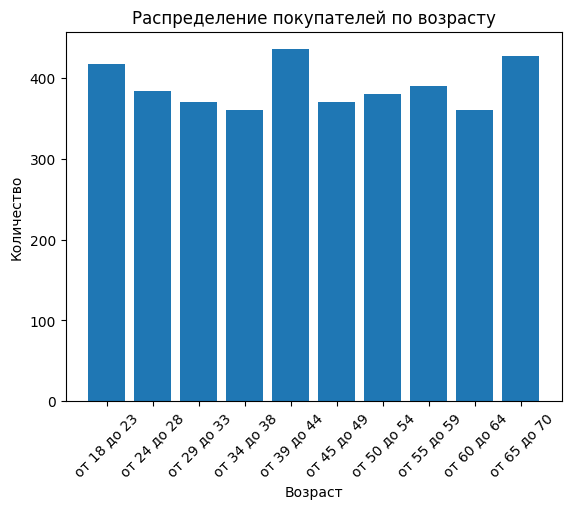

In [39]:
fig, ax = plt.subplots()
ax.bar(df_grouped_by_age_cohorts['age_description'], df_grouped_by_age_cohorts['cnt'])

ax.set_ylabel('Количество')
ax.set_xlabel('Возраст')
ax.set_title('Распределение покупателей по возрасту')
plt.xticks(rotation=45)
plt.show()

Наше распределение похоже на равномерное, немного больше чем другие возрасты, покупают клиенты в возрасте от 39 до 44, от 65 до 70 и от 18 до 23

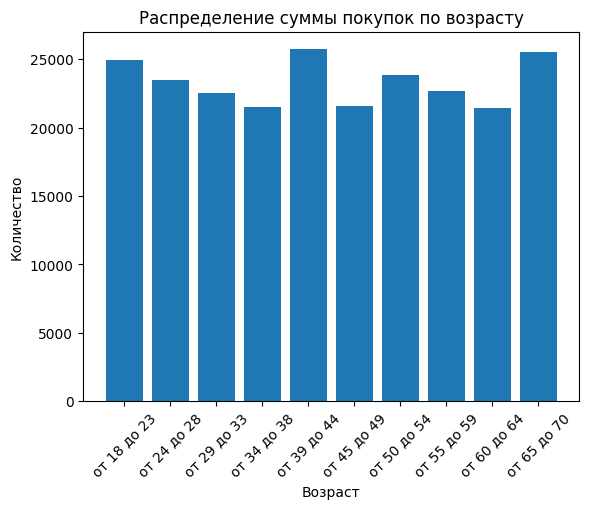

In [40]:
fig, ax = plt.subplots()
ax.bar(df_grouped_by_age_cohorts['age_description'], df_grouped_by_age_cohorts['amount_sum'])

ax.set_ylabel('Количество')
ax.set_xlabel('Возраст')
ax.set_title('Распределение суммы покупок по возрасту')
plt.xticks(rotation=45)
plt.show()

Примерно такая же картина по сумме покупок

In [41]:
df = df.merge(df_grouped_by_age[['Age', 'Age_min', 'Age_max', 'age_description']], on='Age')

In [42]:
age_pivot = df.groupby(by=['age_description', 'Frequency of Purchases']).agg({'Customer ID': 'count'}).reset_index().pivot(index='age_description', columns='Frequency of Purchases')['Customer ID']

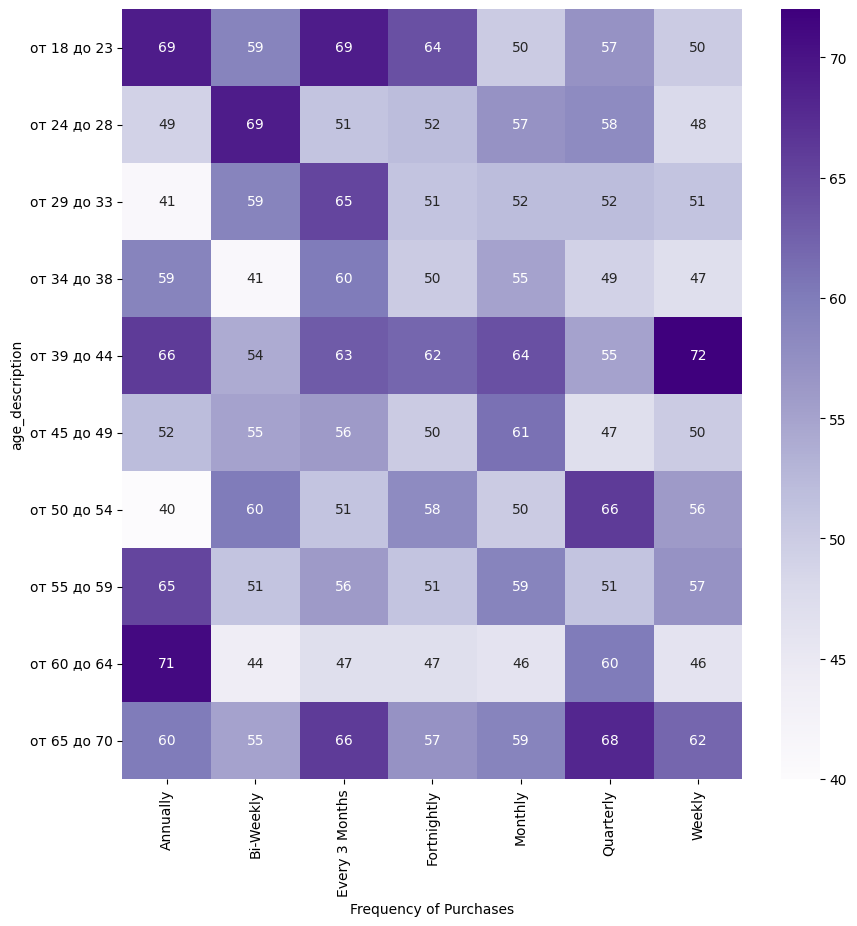

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(age_pivot, annot=True, fmt="g", cmap='Purples')
plt.show()

Чаще всего покупают клиенты в возрасте от 39 до 44 лет

In [44]:
# Разделим цены товаров по когортам
df_grouped_by_age['decile_amount'] = pd.qcut(df_grouped_by_age['amount_sum'], 10, labels=False)

In [45]:
df_grouped_by_age_amount = df.groupby(by=['age_description', 'Purchase Amount (USD)']).agg({'Customer ID': 'count'}).reset_index()
df_grouped_by_age_amount['decile_amount'] = pd.qcut(df_grouped_by_age_amount['Purchase Amount (USD)'], 10, labels=False)
df_grouped_by_age_amount['decile_amount'] = df_grouped_by_age_amount['decile_amount'] + 1

In [46]:
amount_cohorts = df_grouped_by_age_amount.groupby('decile_amount').agg({'Purchase Amount (USD)': ['min', 'max']}).reset_index()
amount_cohorts.columns = ['_'.join(col).rstrip('_') for col in amount_cohorts.columns.values]
amount_cohorts['amount_description'] = 'от ' + amount_cohorts['Purchase Amount (USD)_min'].astype(str) + ' до ' + amount_cohorts['Purchase Amount (USD)_max'].astype(str)
df_grouped_by_age_amount = df_grouped_by_age_amount.merge(amount_cohorts, on='decile_amount')

In [47]:
df_grouped_by_age_cohorts_amount = df_grouped_by_age_amount.groupby(by=['age_description', 'amount_description']).agg({'Customer ID': 'sum'})
df_grouped_by_age_cohorts_amount = df_grouped_by_age_cohorts_amount.reset_index()
age_amount_pivot = df_grouped_by_age_cohorts_amount.pivot(index='amount_description', columns='age_description')['Customer ID']

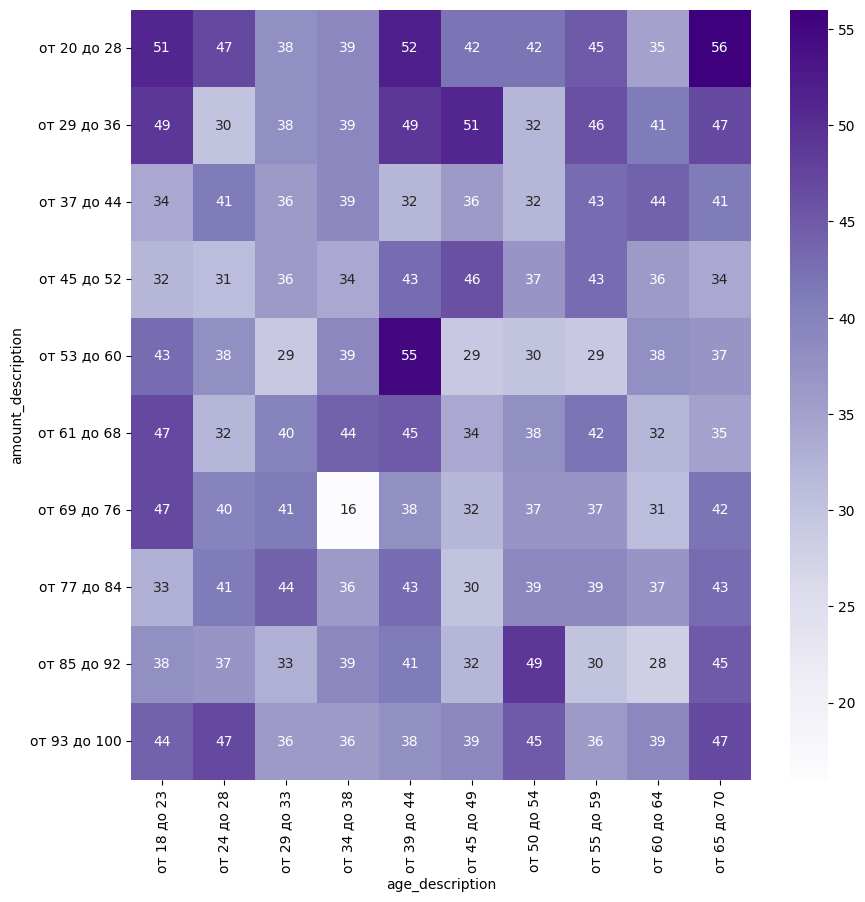

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(age_amount_pivot, annot=True, fmt="g", cmap='Purples')
plt.show()

Больше всего дорогие товары покупают люди в возрасте от 50 до 54 лет 

**Посмотрим на зависимость цвета одежды и сезона**

In [49]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'decile', 'Age_min', 'Age_max',
       'age_description'],
      dtype='object')

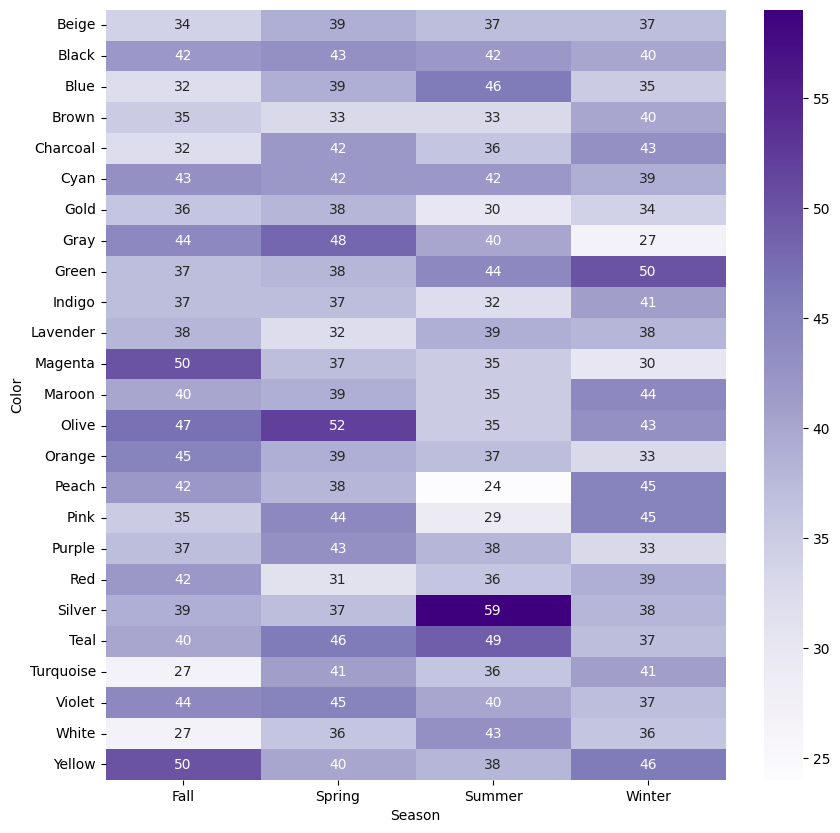

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(df.groupby(['Season', 'Color'])['Customer ID'].count().reset_index().pivot(index='Color', columns='Season')['Customer ID'], annot=True, fmt="g", cmap='Purples')
plt.show()

Визуально кажется, что зависимость есть:
- летом чаще покупают одежду серебряного цвета и цвета teal
- зимой чаще покупают зеленого цвета
- весной - оливкого
- осенью - желтого и пурпурного

In [51]:
# попробуем провести тест хи квадрат
# H0 - между цветом и сезоном нет зависимости
# H1 - между цветом и сезоном существует зависимость
df_season_color = (len(df['Color'].unique()) - 1)*(len(df['Season'].unique()) - 1) # количество степеней свободы

In [52]:
import scipy.stats as stats

In [53]:
chi2, p, dof, expected = stats.chi2_contingency(df.groupby(['Season', 'Color'])['Customer ID'].count().reset_index().pivot(index='Color', columns='Season')['Customer ID'])

In [54]:
p

0.718551112120402

p-value намного выше 0.05, значит можем сделать вывод, что зависимость между цветом и сезоном не статистически значима

**Посчитаем наш сезонный mau (уникальных пользователей за сезон) и его динамику.**

In [55]:
season_mau = df.groupby('Season').agg({'Customer ID': 'nunique'}).reset_index()
season_mau = season_mau.rename(columns={'Customer ID': 'cnt_users'})

In [56]:
season_mau['cnt_users'].sum()/season_mau['Season'].count()

975.0

In [57]:
season_mau.loc[season_mau['Season'] == 'Winter', 'Season'] = '1. Winter'
season_mau.loc[season_mau['Season'] == 'Spring', 'Season'] = '2. Spring'
season_mau.loc[season_mau['Season'] == 'Summer', 'Season'] = '3. Summer'
season_mau.loc[season_mau['Season'] == 'Fall', 'Season'] = '4. Fall'
season_mau = season_mau.sort_values('Season').reset_index(drop=True)

In [58]:
season_mau

,Season,cnt_users
0,1. Winter,971
1,2. Spring,999
2,3. Summer,955
3,4. Fall,975


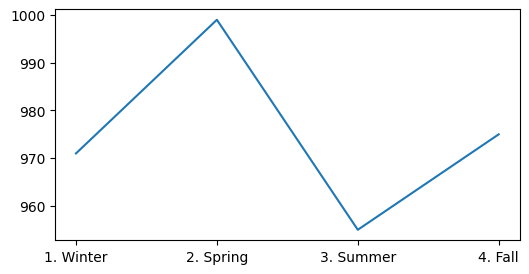

In [59]:
plt.figure(figsize=(6,3))
plt.plot(season_mau['Season'], season_mau['cnt_users'])
plt.show()

Найдите самую популярную букву в названии одежды

In [60]:
letters = {}
for item in df['Item Purchased'].unique():
    item_lower = item.lower()
    for i in item_lower:
        if i in letters:
            letters[i] += 1
        else:
            letters[i] = 1

In [61]:
print('Самая популярная буква:', pd.DataFrame(list(letters.items()), columns=['letter', 'cnt']).sort_values(by='cnt', ascending=False)['letter'].iloc[0])

Самая популярная буква: s


<h1>Задание 2</h1> 

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [62]:
drinks = pd.read_csv('drinks.csv')

In [63]:
def top_5_countries(drink):
    drink_names = {
        'beer_servings': 'пива',
        'wine_servings': 'вина',
        'spirit_servings': 'спирита'
    }
    print(f'Топ 5 стран по потреблению {drink_names[drink]}:')
    result = drinks.sort_values(by=drink, ascending=False)[['country', drink]].head(5)
    return result

In [64]:
wine = top_5_countries('wine_servings')
print(wine)

Топ 5 стран по потреблению вина:
         country  wine_servings
61        France            370
136     Portugal            339
3        Andorra            312
166  Switzerland            280
48       Denmark            278


In [65]:
beer = top_5_countries('beer_servings')
print(beer)

Топ 5 стран по потреблению пива:
            country  beer_servings
117         Namibia            376
45   Czech Republic            361
62            Gabon            347
65          Germany            346
98        Lithuania            343


In [66]:
spirit = top_5_countries('spirit_servings')
print(spirit)

Топ 5 стран по потреблению спирита:
                country  spirit_servings
68              Grenada              438
15              Belarus              373
73                Haiti              326
141  Russian Federation              326
144           St. Lucia              315


In [67]:
print('Топ стран по потреблению литров чистого алкоголя')
drinks.sort_values(by='total_litres_of_pure_alcohol', ascending=False)[['country', 'total_litres_of_pure_alcohol']].head(5)

Топ стран по потреблению литров чистого алкоголя


,country,total_litres_of_pure_alcohol
15,Belarus,14.4
98,Lithuania,12.9
3,Andorra,12.4
68,Grenada,11.9
45,Czech Republic,11.8


<h1>Задание 3</h1> 

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам 

* частоту употребления конкретных проклятий 

* распределение времени между проклятиями 

In [68]:
tarantino = pd.read_csv('tarantino.csv')

In [69]:
tarantino.head(5)

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61


In [70]:
# количество проклятий и летальных исходов
tarantino_grouped_type = tarantino.groupby('type')['minutes_in'].count()
tarantino_grouped_type

type
death     190
word     1704
Name: minutes_in, dtype: int64

In [71]:
tarantino_grouped_movie_type = tarantino.groupby(['movie', 'type']).agg({'minutes_in': 'count'}).reset_index()
tarantino_grouped_movie = tarantino.groupby(['movie']).agg({'minutes_in': 'count'}).reset_index()
tarantino_grouped_movie_type = tarantino_grouped_movie_type.rename(columns={'minutes_in': 'cnt'})
tarantino_grouped_movie = tarantino_grouped_movie.rename(columns={'minutes_in': 'cnt_all_types'})
tarantino_grouped_movie_type = tarantino_grouped_movie_type.merge(tarantino_grouped_movie, on='movie')

In [72]:
tarantino_grouped_movie_type['ratio'] = tarantino_grouped_movie_type['cnt'] / tarantino_grouped_movie_type['cnt_all_types']

In [73]:
tarantino_grouped_movie_type.pivot(index='movie', columns='type')[['cnt', 'ratio']]

cnt          ratio          
type                death word     death      word
movie                                             
Django Unchained       47  262  0.152104  0.847896
Inglorious Basterds    48   58  0.452830  0.547170
Jackie Brown            4  368  0.010753  0.989247
Kill Bill: Vol. 1      63   57  0.525000  0.475000
Kill Bill: Vol. 2      11   69  0.137500  0.862500
Pulp Fiction            7  469  0.014706  0.985294
Reservoir Dogs         10  421  0.023202  0.976798

Только в одном фильме смертей было больше чем проклятий - Kill Bill: Vol. 1

In [74]:
# Частота употреблений отдельных проклятий - топ 10 проклятий
tarantino.groupby('word').agg({'minutes_in': 'count'}).reset_index().sort_values(by='minutes_in', ascending=False).head(10)

,word,minutes_in
28,fucking,407
49,shit,221
22,fuck,213
46,n-word,179
0,ass,140
31,goddamn,113
43,motherfucker,70
7,bitch,64
35,hell,45
15,damn,37


In [75]:
tarantino['minutes_in_lag'] = tarantino[tarantino['word'].notna()].sort_values(by=['movie', 'minutes_in']).groupby(by='movie')['minutes_in'].shift(1)
tarantino['delta'] = tarantino['minutes_in'] - tarantino['minutes_in_lag']

In [76]:
delta_distribution = tarantino[(tarantino['type'] == 'word') & tarantino['delta'].notna()].groupby('delta').agg({'minutes_in': 'count'}).reset_index()

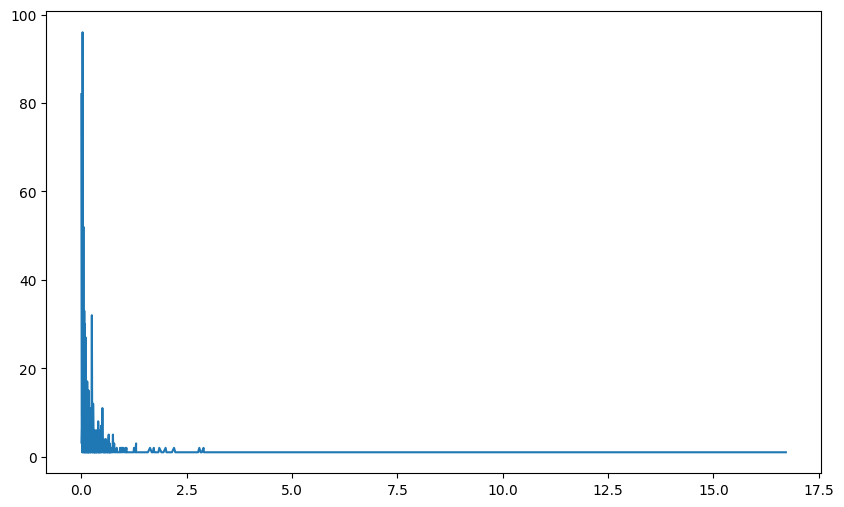

In [77]:
plt.figure(figsize=(10,6))
plt.plot(delta_distribution['delta'], delta_distribution['minutes_in'])
plt.show()

In [78]:
delta_distribution_rounded = delta_distribution.copy()
delta_distribution_rounded['delta'] = delta_distribution_rounded['delta'].apply(round)
delta_distribution_rounded = delta_distribution_rounded.groupby('delta').agg({'minutes_in': 'sum'}).reset_index()

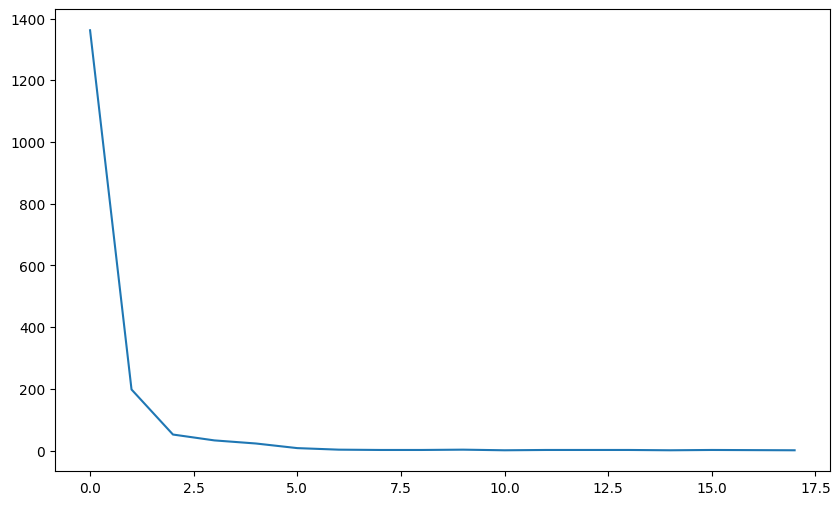

In [79]:
plt.figure(figsize=(10,6))
plt.plot(delta_distribution_rounded['delta'], delta_distribution_rounded['minutes_in'])
plt.show()

Большинство промежутков между ругательствами от 0 до 1 секунды